<a href="https://colab.research.google.com/github/Madhukiran777/TechnoHacks_ML/blob/main/Task_3_Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [ ]:
# Importing Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading dataset
df = pd.read_csv("/content/sample_data/diabetes.csv")

diabetic = df[df['Outcome'] == 1] # dataset with non-diabetics
non_diabetic = df[df['Outcome'] == 0] # dataset with diabetics

np.random.seed(42)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# **Describe of Diabetics**

In [ ]:
diabetic.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164,1.0
std,3.741239,31.939622,21.491812,17.679711,138.689125,7.262967,0.372354,10.968254,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,1.0
25%,1.750000,119.000000,66.000000,0.000000,0.000000,30.800000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.250000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


# **Describe of Non-Diabeics**

In [ ]:
non_diabetic.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.298000,109.9800,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000,0.0
std,3.017185,26.1412,18.063075,14.889947,98.865289,7.689855,0.299085,11.667655,0.0
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.0
25%,1.000000,93.0000,62.000000,0.000000,0.000000,25.400000,0.229750,23.000000,0.0
50%,2.000000,107.0000,70.000000,21.000000,39.000000,30.050000,0.336000,27.000000,0.0
75%,5.000000,125.0000,78.000000,31.000000,105.000000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.0000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000,0.0


# **Function That Generates All Distplot According to Columns**

In [ ]:
def distplot_by_df(dataframe):
    fig, axs = plt.subplots(4, 2, figsize=(15, 12))
    axs = axs.flatten()

    for i, col in enumerate(dataframe.iloc[:, :-1].columns):
        sns.distplot(dataframe[col], ax=axs[i], rug=True)

    plt.tight_layout()
    plt.show()

**Distplot of diabetics**

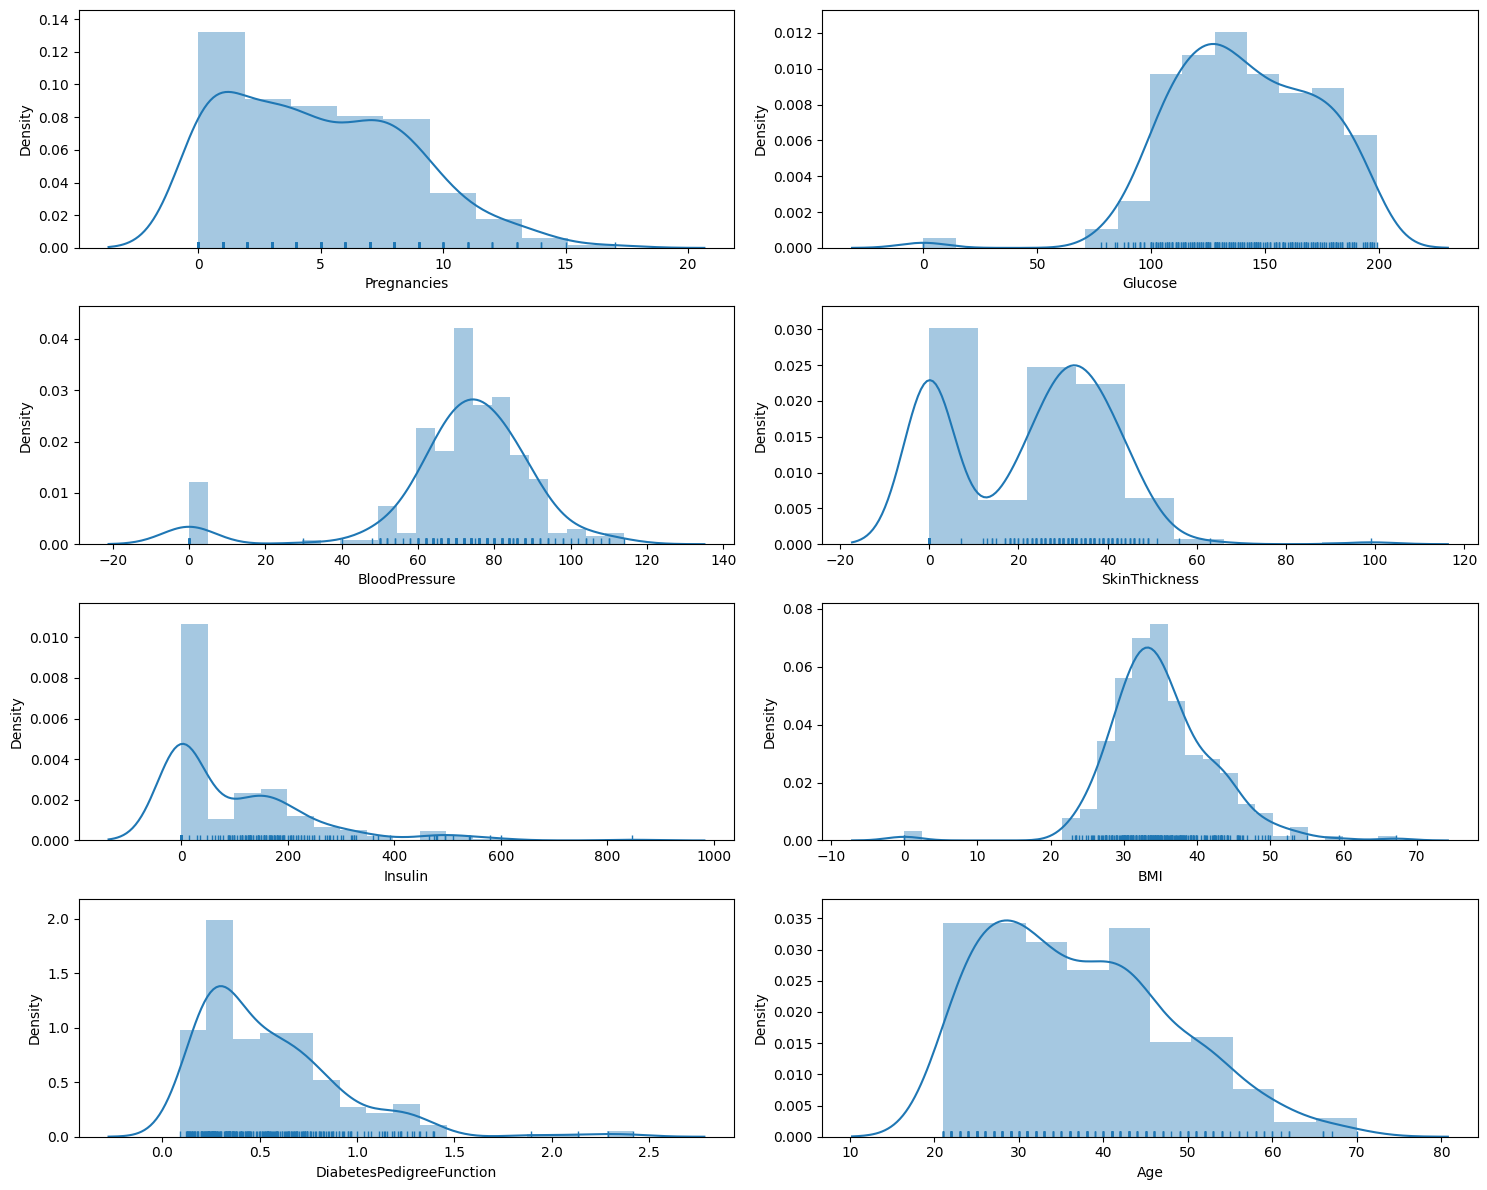

In [ ]:
distplot_by_df(diabetic)

**Distplot of Non-diabetics**

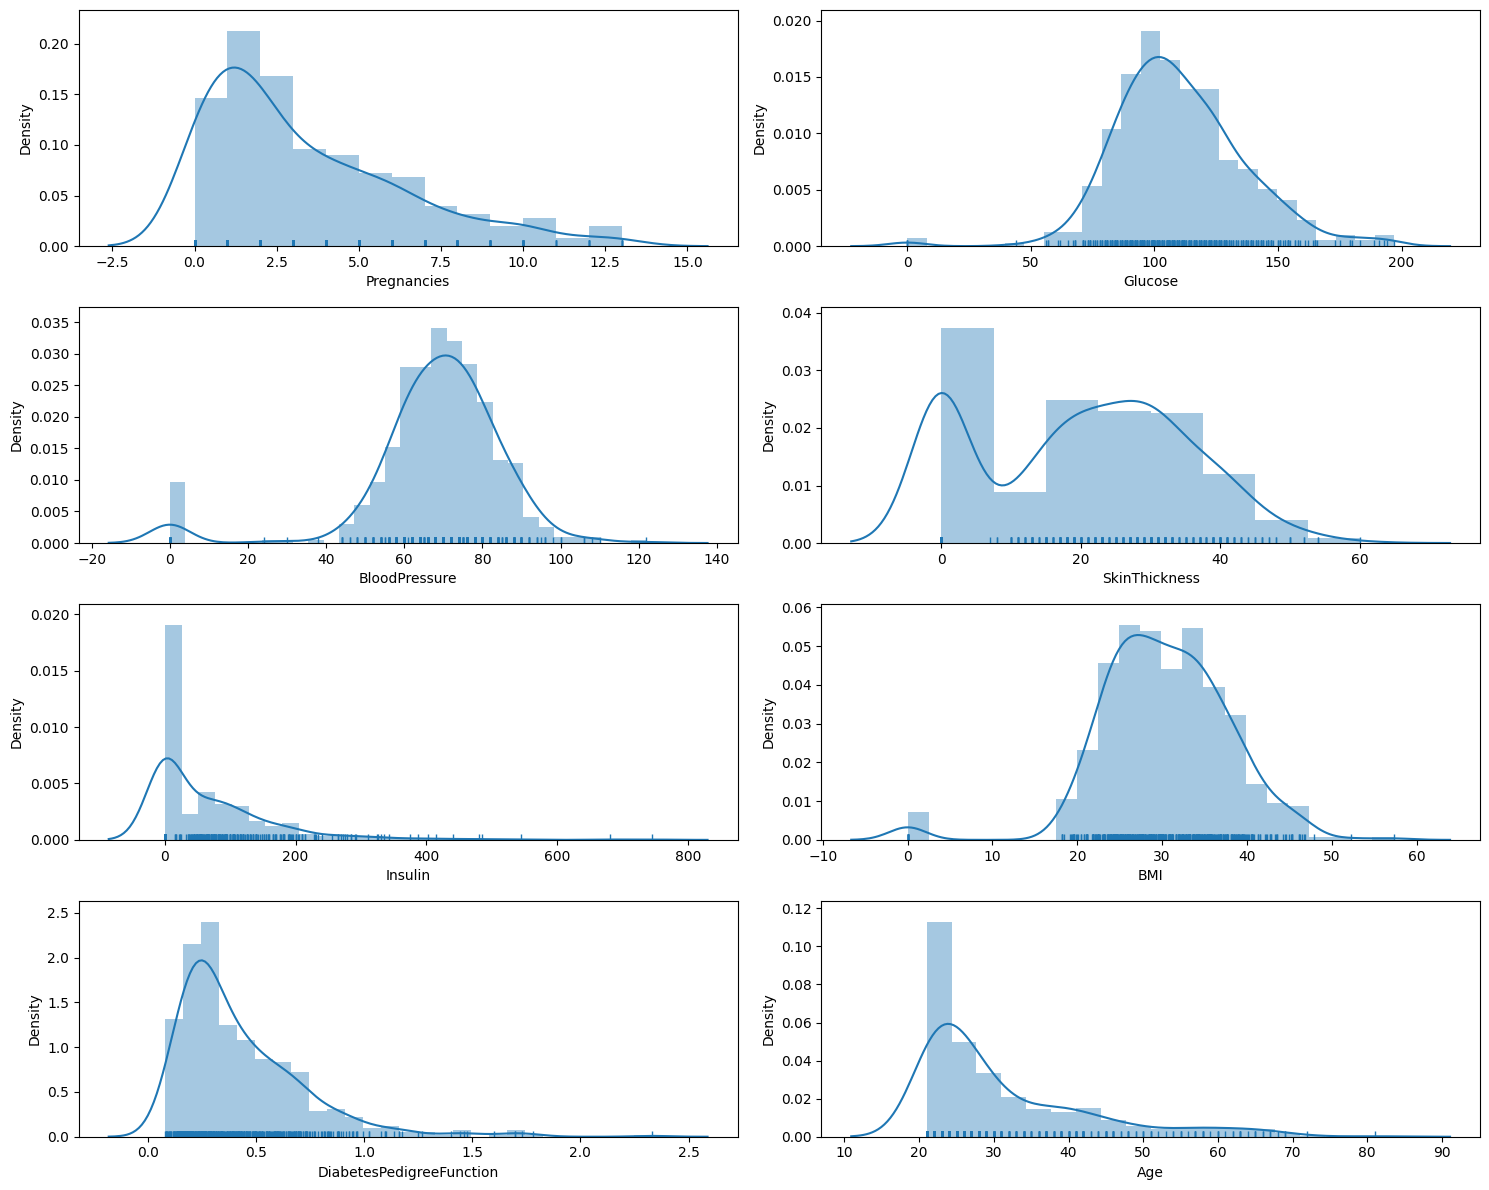

In [ ]:
distplot_by_df(non_diabetic)

# **Spliting my data**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 0:-1]
Y = df.iloc[:,-1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

# **Testing the "DecisionTreeClassifier"**

In [ ]:
from sklearn.tree import DecisionTreeClassifier


classificador_simples = DecisionTreeClassifier()

classificador_simples.fit(X_train, Y_train)
classificador_simples.score(X_test, Y_test)

0.7086614173228346

# **Using a confusion matrix**

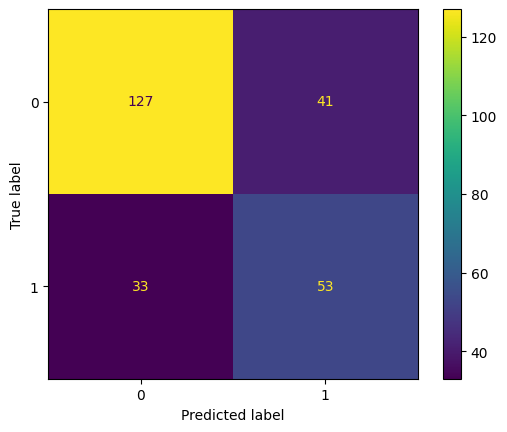

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(classificador_simples, X_test, Y_test)

# **Using the "classification_report"**

In [ ]:
from sklearn.metrics import classification_report
real_values = Y_test
predicted_values = classificador_simples.predict(X_test)
target_names = ['non-diabetic', 'diabetic']
print(classification_report(real_values, predicted_values, target_names=target_names))

              precision    recall  f1-score   support

non-diabetic       0.79      0.76      0.77       168
    diabetic       0.56      0.62      0.59        86

    accuracy                           0.71       254
   macro avg       0.68      0.69      0.68       254
weighted avg       0.72      0.71      0.71       254



# **Most used features**

In [ ]:
pd.Series(data = classificador_simples.feature_importances_, index=X_test.columns).sort_values()

SkinThickness               0.044277
Pregnancies                 0.054460
DiabetesPedigreeFunction    0.082538
BloodPressure               0.089641
Age                         0.092706
Insulin                     0.109484
BMI                         0.140799
Glucose                     0.386096
dtype: float64

# **Looking for the best Classification algorithm**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

models = {
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'SVC': SVC(),
    'LogisticRegression': LogisticRegression(max_iter=1000000)
}

best_model = None
best_score = 0

for model_name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(Y_test, y_pred)

    if score > best_score:
        best_model = model
        best_score = score

print(f"Melhor modelo: {best_model.__class__.__name__}")
print(f"Score (accuracy): {best_score}")

Melhor modelo: RandomForestClassifier
Score (accuracy): 0.7637795275590551


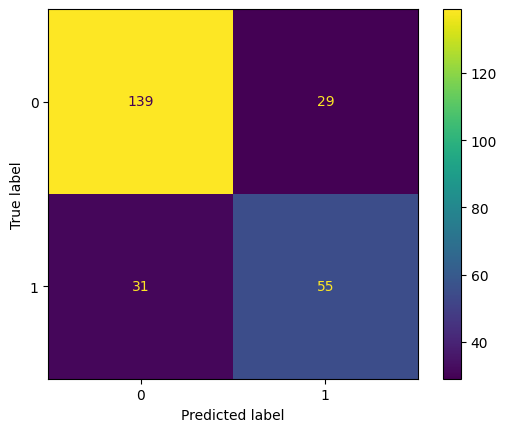

In [ ]:
ConfusionMatrixDisplay.from_estimator(best_model, X_test, Y_test)

In [ ]:
pd.Series(data = best_model.feature_importances_, index=X_test.columns).sort_values()

SkinThickness               0.064774
Insulin                     0.069932
Pregnancies                 0.083219
BloodPressure               0.091933
DiabetesPedigreeFunction    0.117167
Age                         0.144207
BMI                         0.149955
Glucose                     0.278814
dtype: float64

# **Looking for the best hyperparameter**

**Running this algorithm takes some time, so I'll just comment on itext**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

best_model = RandomForestClassifier(criterion='entropy', max_depth = 8, min_samples_leaf= 4, min_samples_split= 8)
best_model.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4,
                       min_samples_split=8)

In [ ]:
print("My best accuracy was: ", best_model.score(X_test, Y_test))

My best accuracy was:  0.7716535433070866
